In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions
from sklearn import tree
from sklearn.tree import export_text
sns.set()

In [2]:
#read the csv file into a Pandas data frame
df_census = pd.read_csv('census1994.csv')

df_census = df_census.rename(columns={'native-country': 'native_country'})
df_census = df_census.rename(columns={'education-num': 'education_num'})
df_census = df_census.rename(columns={'hours-per-week': 'hours_per_week'})

df_census = df_census[(df_census.WorkClass != ' ?') & (df_census.occupation != ' ?') & (df_census.native_country != ' ?')]

In [3]:
#return the first 5 rows of the dataset
df_census.head()

,Date,Age,WorkClass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours_per_week,native_country,class
0,3/20/1994,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1/14/1994,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,8/14/1994,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3/17/1994,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,9/20/1994,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
#return the first 5 rows of the dataset
df_census.tail()

,Date,Age,WorkClass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours_per_week,native_country,class
32556,12/29/1994,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,1/30/1994,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,9/26/1994,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,4/5/1994,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,3/5/1994,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
print(df_census['class'].unique())

[' <=50K' ' >50K']


In [6]:
# create the Labelencoder object
le = preprocessing.LabelEncoder()

#convert the categorical columns into numeric
df_census['Date'] = le.fit_transform(df_census['Date'])
df_census['WorkClass'] = le.fit_transform(df_census['WorkClass'])
df_census['education'] = le.fit_transform(df_census['education'])
df_census['marital-status'] = le.fit_transform(df_census['marital-status'])
df_census['occupation'] = le.fit_transform(df_census['occupation'])
df_census['relationship'] = le.fit_transform(df_census['relationship'])
df_census['race'] = le.fit_transform(df_census['race'])
df_census['gender'] = le.fit_transform(df_census['gender'])
df_census['native_country'] = le.fit_transform(df_census['native_country'])
df_census['class'] = le.fit_transform(df_census['class'])

In [7]:
#Normalization
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df_census)
df_census = pd.DataFrame(np_scaled, columns = df_census.columns)

In [8]:
X = df_census.iloc[:,0:15]  #independent columns
y = df_census.iloc[:,-1]    #target column i.e price range

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [9]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth=4)
clf_gini.fit(xTrain, yTrain) 

# Predicton on test with giniIndex 
y_pred_gini = clf_gini.predict(xTest) 

In [10]:
print ("Accuracy : ",metrics.accuracy_score(yTest,y_pred_gini)*100) 

Accuracy :  84.07558846281357


In [11]:
confusion_matrix(yTest, y_pred_gini)


array([[6365,  399],
       [1042, 1243]], dtype=int64)

In [12]:
print(classification_report(yTest,y_pred_gini))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      6764
         1.0       0.76      0.54      0.63      2285

    accuracy                           0.84      9049
   macro avg       0.81      0.74      0.77      9049
weighted avg       0.83      0.84      0.83      9049



C:\Users\16824\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


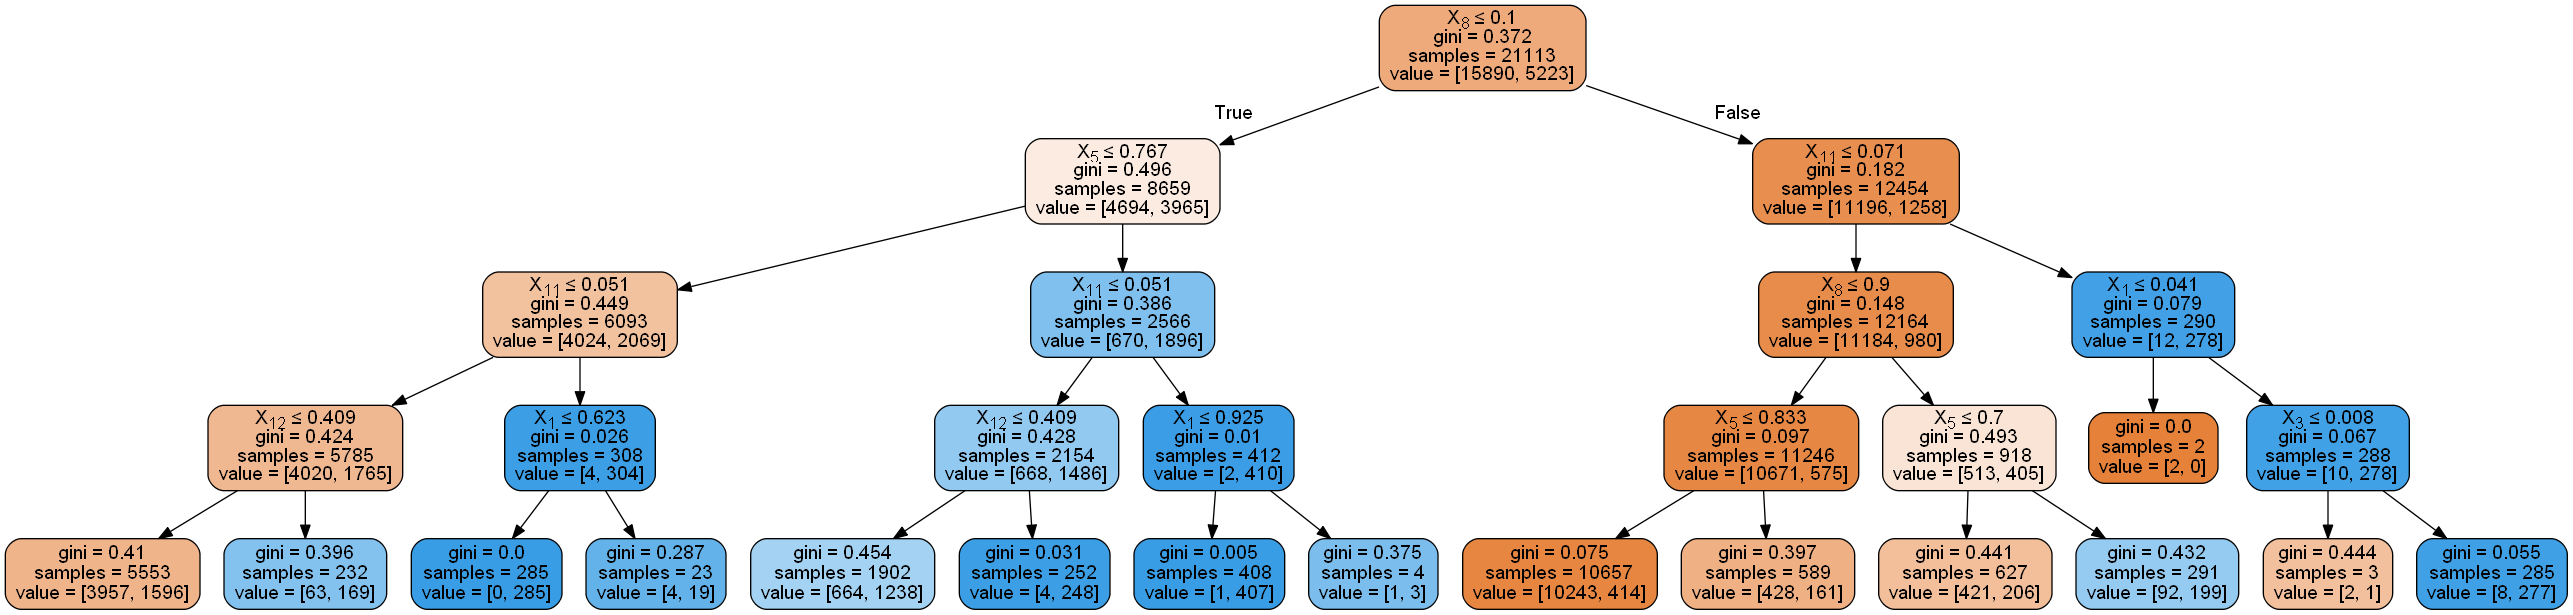

In [13]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_gini, out_file=dot_data,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [14]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 0,max_depth=4) 
  
# Performing training 
clf_entropy.fit(xTrain, yTrain) 

# Predicton on test with giniIndex 
y_pred_entropy = clf_gini.predict(xTest) 

In [15]:
print ("Accuracy : ",metrics.accuracy_score(yTest,y_pred_entropy)*100) 

Accuracy :  84.07558846281357


In [16]:
confusion_matrix(yTest, y_pred_entropy)


array([[6365,  399],
       [1042, 1243]], dtype=int64)

In [17]:
print(classification_report(yTest,y_pred_entropy))

              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90      6764
         1.0       0.76      0.54      0.63      2285

    accuracy                           0.84      9049
   macro avg       0.81      0.74      0.77      9049
weighted avg       0.83      0.84      0.83      9049



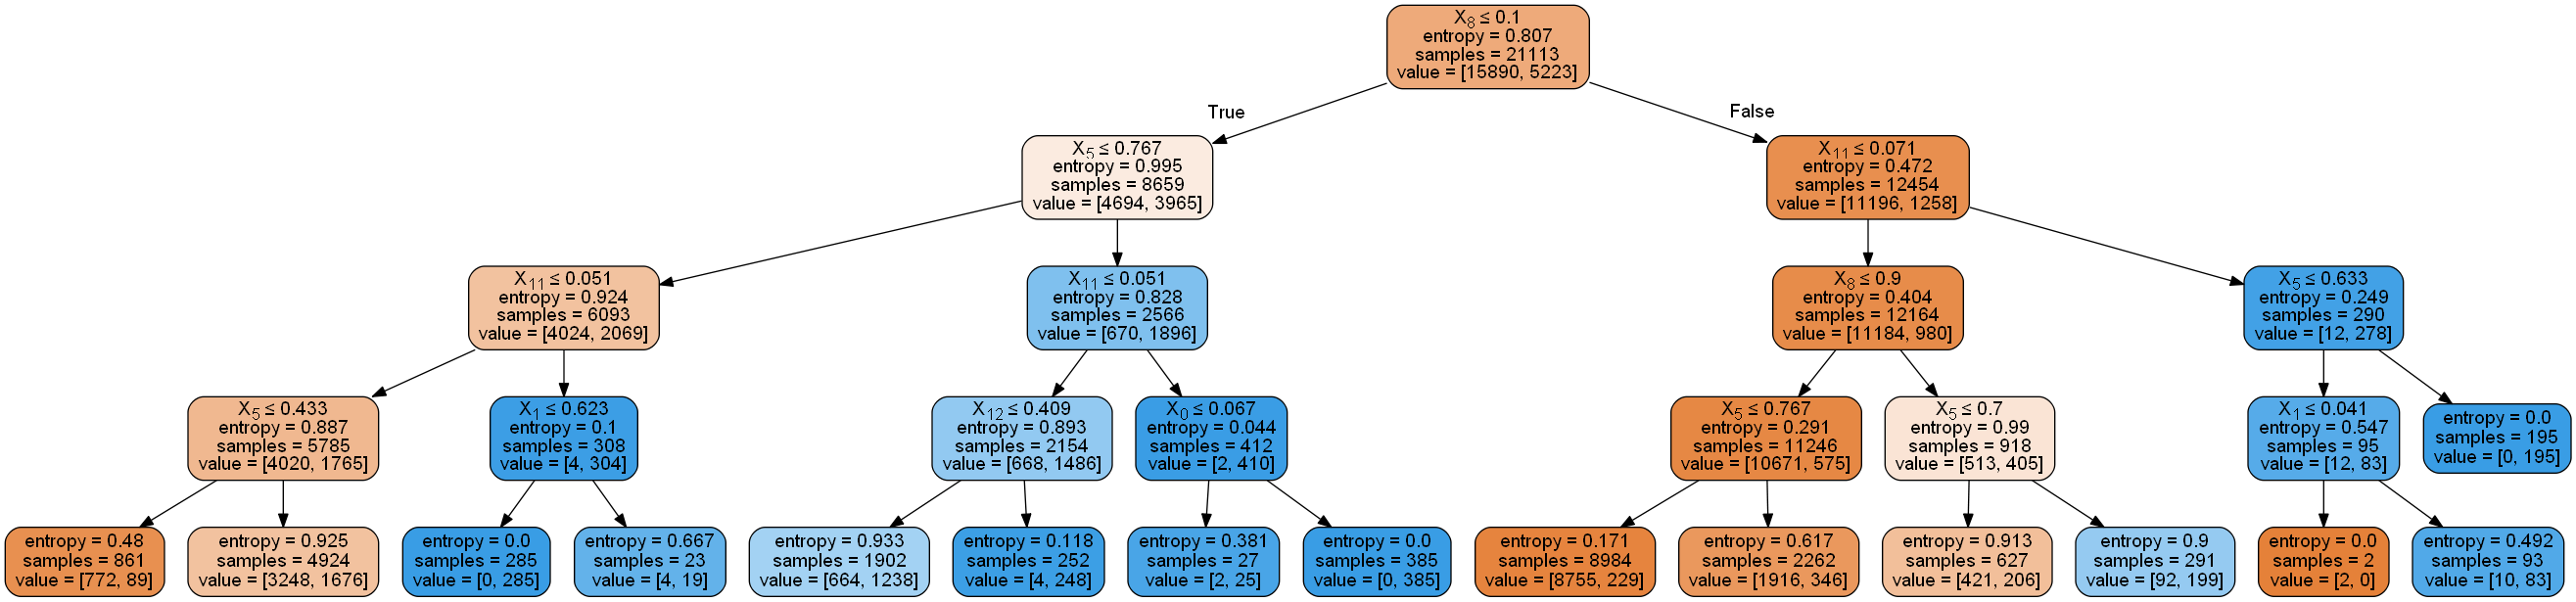

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [19]:
#Deriving rules for Gini
selected_columns = X

tree_rules = tree.export_text(clf_gini)
print(tree_rules)

|--- feature_8 <= 0.10
|   |--- feature_5 <= 0.77
|   |   |--- feature_11 <= 0.05
|   |   |   |--- feature_12 <= 0.41
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_12 >  0.41
|   |   |   |   |--- class: 1.0
|   |   |--- feature_11 >  0.05
|   |   |   |--- feature_1 <= 0.62
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  0.62
|   |   |   |   |--- class: 1.0
|   |--- feature_5 >  0.77
|   |   |--- feature_11 <= 0.05
|   |   |   |--- feature_12 <= 0.41
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_12 >  0.41
|   |   |   |   |--- class: 1.0
|   |   |--- feature_11 >  0.05
|   |   |   |--- feature_1 <= 0.92
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  0.92
|   |   |   |   |--- class: 1.0
|--- feature_8 >  0.10
|   |--- feature_11 <= 0.07
|   |   |--- feature_8 <= 0.90
|   |   |   |--- feature_5 <= 0.83
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  0.83
|   |   |   |   |--- class: 0.0
|   |   |--- feature_8 >  0.90
|   |   

In [20]:
#Deriving rules for Entropy
selected_columns = X

tree_rules = tree.export_text(clf_entropy)
print(tree_rules)

|--- feature_8 <= 0.10
|   |--- feature_5 <= 0.77
|   |   |--- feature_11 <= 0.05
|   |   |   |--- feature_5 <= 0.43
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  0.43
|   |   |   |   |--- class: 0.0
|   |   |--- feature_11 >  0.05
|   |   |   |--- feature_1 <= 0.62
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_1 >  0.62
|   |   |   |   |--- class: 1.0
|   |--- feature_5 >  0.77
|   |   |--- feature_11 <= 0.05
|   |   |   |--- feature_12 <= 0.41
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_12 >  0.41
|   |   |   |   |--- class: 1.0
|   |   |--- feature_11 >  0.05
|   |   |   |--- feature_0 <= 0.07
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  0.07
|   |   |   |   |--- class: 1.0
|--- feature_8 >  0.10
|   |--- feature_11 <= 0.07
|   |   |--- feature_8 <= 0.90
|   |   |   |--- feature_5 <= 0.77
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  0.77
|   |   |   |   |--- class: 0.0
|   |   |--- feature_8 >  0.90
|   |   | 